In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Constantes
UK_Cobre = 9.979  # Potencial de ionización del orbital K del cobre (keV)
d = 2.014e-10  # Distancia entre los planos de la red cristalina (metros)

In [192]:
# Leer los datos de voltaje constante desde el archivo .txt
nombre_archivo = 'Actividad_3_Intesidad_Voltaje_Corriente/TensionVar.txt'  # Reemplaza con el nombre de tu archivo

columnas = [
    'Ángulo del cristal (θ)',
    'Tasa con 11kV',
    'Tasa con 14kV',
    'Tasa con 17kV',
    'Tasa con 20kV',
    'Tasa con 23kV',
    'Tasa con 26kV',
    'Tasa con 29kV',
    'Tasa con 32kV',
    'Tasa con 35kV'
]

datos_corriente_constante = pd.read_csv(nombre_archivo, delimiter='\t', names=columnas, skiprows = 2, decimal=',')

In [193]:
# Función para calcular la longitud de onda (λ) en función del ángulo (θ)
def calcular_longitud_de_onda(angulo):
    return 1e10 *2 * d * np.sin(np.radians(angulo))

datos_corriente_constante['Ángulo del cristal (θ)'] = datos_corriente_constante['Ángulo del cristal (θ)'] + 1.5

# Calcular la longitud de onda (λ) en nanómetros (nm)
datos_corriente_constante['Longitud de Onda (λ)'] = calcular_longitud_de_onda(datos_corriente_constante['Ángulo del cristal (θ)'])
lambda_nm = datos_corriente_constante['Longitud de Onda (λ)']

# Función para calcular la intensidad (I) utilizando la relación dada
def calcular_intensidad(UA, IA, b):
    return b * 1 * (UA - UK_Cobre)**(3/2)

# Ajuste de parámetros para obtener 'b'
params, covariance = curve_fit(calcular_intensidad, lambda_nm, datos_corriente_constante['Tasa con 11kV'])

# Valor óptimo de 'b' obtenido del ajuste
b_optimo = params[0]

/opt/homebrew/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


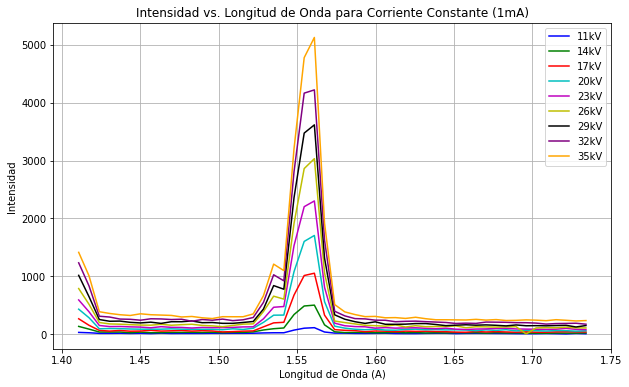

In [194]:
# Crear una figura y ejes para la gráfica
fig, ax = plt.subplots(figsize=(10, 6))

# Colores para los diferentes voltajes
colores = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange']

# Etiquetas para los voltajes
etiquetas_voltaje = ['11kV', '14kV', '17kV', '20kV', '23kV', '26kV', '29kV', '32kV', '35kV']

for i, etiqueta_voltaje in enumerate(etiquetas_voltaje):
    intensidad = datos_corriente_constante['Tasa con ' + etiqueta_voltaje]
    plt.plot(lambda_nm, intensidad, linestyle='-', color=colores[i], label=etiqueta_voltaje)


# Configurar etiquetas y título
plt.xlabel('Longitud de Onda (A)')
plt.ylabel('Intensidad')
plt.title('Intensidad vs. Longitud de Onda para Corriente Constante (1mA)')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.grid()
plt.savefig('tension_variable.png')
plt.show()

In [195]:
lambda_K_alpha = 1.541
data_K_alpha = datos_corriente_constante[
    (datos_corriente_constante['Longitud de Onda (λ)'] >= lambda_K_alpha - 0.001) & 
    (datos_corriente_constante['Longitud de Onda (λ)'] <= lambda_K_alpha + 0.001)].iloc[0]
data_K_alpha

Ángulo del cristal (θ)      22.500000
Tasa con 11kV               21.000000
Tasa con 14kV              104.000000
Tasa con 17kV              202.000000
Tasa con 20kV              327.000000
Tasa con 23kV              475.000000
Tasa con 26kV              603.000000
Tasa con 29kV              774.000000
Tasa con 32kV              919.000000
Tasa con 35kV             1096.000000
Longitud de Onda (λ)         1.541449
Name: 20, dtype: float64

In [196]:
etiquetas_voltaje = [11, 14, 17, 20, 23, 26, 29, 32, 35]

intensidades = []
for i, etiqueta_voltaje in enumerate(etiquetas_voltaje):
    intensidad = datos_corriente_constante['Tasa con ' + str(etiqueta_voltaje) + 'kV'][0]
    intensidades.append(intensidad)

In [197]:
def fit_func(UA, b):
    UK = 9.979  # Potencial de ionización del orbital K en keV
    IA = 1  # Corriente en amperios (1mA)
    return b * IA * (UA - UK)**(3/2)

# Datos de voltaje y intensidades (asegúrate de que tengan la misma longitud)
voltajes = np.array(etiquetas_voltaje)
intensidades = np.array(intensidades)

# Realiza el ajuste de mínimos cuadrados
params, covariance = curve_fit(fit_func, voltajes, intensidades)

# Parámetro b es el primer elemento de params
b = params[0]
b

# Extrae la varianza de b desde la matriz de covarianza
var_b = covariance[0, 0]

# Calcula la incertidumbre de b como la raíz cuadrada de la varianza
incertidumbre_b = np.sqrt(var_b)
print(r'{} +- {}'.format(b, incertidumbre_b))

11.85732349151124 +- 0.205799715641064


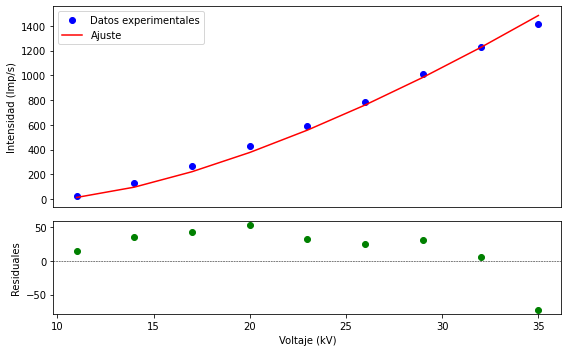

In [198]:
# Calcula los valores ajustados utilizando la función de ajuste
ajuste = fit_func(voltajes, b)

# Calcula los residuales
residuales = intensidades - ajuste

# Crea una figura con cuadrícula personalizada
fig = plt.figure(figsize=(8, 5))
gs = fig.add_gridspec(3, 1)

# Gráfica del ajuste en el primer subplot
ax1 = fig.add_subplot(gs[0:2, 0])
ax1.plot(voltajes, intensidades, 'bo', label='Datos experimentales')
ax1.plot(voltajes, ajuste, 'r-', label='Ajuste')
ax1.set_ylabel('Intensidad (Imp/s)')
ax1.legend()

# Gráfica de residuales en el segundo subplot (más pequeña)
ax2 = fig.add_subplot(gs[2, 0])
ax2.plot(voltajes, residuales, 'go', label='Residuales')
ax2.axhline(0, color='black', linewidth=0.5, linestyle='--')
ax2.set_xlabel('Voltaje (kV)')
ax2.set_ylabel('Residuales')

ax1.set_xticks([])

plt.tight_layout()
plt.savefig('fit_tension_variable.png')
plt.show()

## Corriente

In [199]:
import pandas as pd
import glob

# Lista de archivos .txt correspondientes a los valores de corriente
archivos_corriente = glob.glob("Actividad_3_Intesidad_Voltaje_Corriente/CorrVar_*.txt")  # Asegúrate de que coincida con los nombres de tus archivos

# Crear un DataFrame vacío para almacenar los datos
df_corriente = pd.DataFrame()

columnas = [
    'Ángulo del cristal (θ)',
    'Tasa con 35kV'
]

# Iterar sobre los archivos y cargar los datos en el DataFrame
for archivo in archivos_corriente:
    # Leer el archivo .txt en un DataFrame temporal
    print(archivo)
    df_temp = pd.read_csv(archivo, sep='\t', delimiter='\t', names=columnas, skiprows = 2, decimal=',')
    
    # Agregar una columna con el valor de corriente correspondiente al nombre del archivo
    corriente = float('.'.join(archivo.split('/')[1].replace('.txt', '').split('_')[1:]))  # Extraer la corriente del nombre del archivo
    print(corriente)
    df_temp['Corriente (mA)'] = corriente
    
    # Concatenar el DataFrame temporal al DataFrame principal
    df_corriente = pd.concat([df_corriente, df_temp], ignore_index=True)

# Mostrar el DataFrame resultante
print(df_corriente)

Actividad_3_Intesidad_Voltaje_Corriente/CorrVar_0_4.txt
0.4
Actividad_3_Intesidad_Voltaje_Corriente/CorrVar_0_5.txt
0.5
Actividad_3_Intesidad_Voltaje_Corriente/CorrVar_0_7.txt
0.7
Actividad_3_Intesidad_Voltaje_Corriente/CorrVar_0_6.txt
0.6
Actividad_3_Intesidad_Voltaje_Corriente/CorrVar_0_2.txt
0.2
Actividad_3_Intesidad_Voltaje_Corriente/CorrVar_0_3.txt
0.3
Actividad_3_Intesidad_Voltaje_Corriente/CorrVar_0_1.txt
0.1
Actividad_3_Intesidad_Voltaje_Corriente/CorrVar_1.txt
1.0
Actividad_3_Intesidad_Voltaje_Corriente/CorrVar_0_8.txt
0.8
Actividad_3_Intesidad_Voltaje_Corriente/CorrVar_0_9.txt
0.9
     Ángulo del cristal (θ)  Tasa con 35kV  Corriente (mA)
0                      19.0          608.0             0.4
1                      19.1          359.0             0.4
2                      19.2          150.0             0.4
3                      19.3          143.0             0.4
4                      19.4          145.0             0.4
..                      ...            ...      

In [200]:
df_corriente['Ángulo del cristal (θ)'] = df_corriente['Ángulo del cristal (θ)'] + 1.5
df_corriente['Longitud de Onda (λ)'] = calcular_longitud_de_onda(df_corriente['Ángulo del cristal (θ)'])

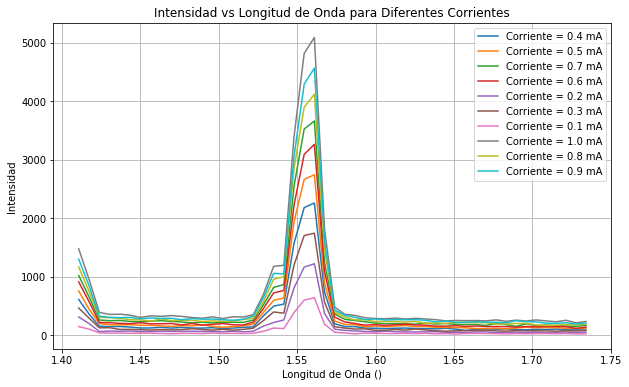

In [201]:
# Crear una figura para la gráfica
plt.figure(figsize=(10, 6))

# Iterar a través de los valores de corriente únicos
corrientes_unicas = df_corriente['Corriente (mA)'].unique()

for corriente in corrientes_unicas:
    # Filtrar el DataFrame para la corriente actual
    df_filtrado = df_corriente[df_corriente['Corriente (mA)'] == corriente]
    
    # Obtener los valores de longitud de onda y la intensidad correspondiente
    longitudes_de_onda = df_filtrado['Longitud de Onda (λ)']
    intensidades = df_filtrado['Tasa con 35kV']
    
    # Crear la gráfica para la corriente actual
    plt.plot(longitudes_de_onda, intensidades, label=f'Corriente = {corriente} mA')

# Personalizar la gráfica
plt.xlabel('Longitud de Onda ()')
plt.ylabel('Intensidad')
plt.title('Intensidad vs Longitud de Onda para Diferentes Corrientes')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.savefig('corriente_variable.png')
plt.show()

In [202]:
# Valor de longitud de onda deseado
lambda_deseado = 1.541

# Tolerancia para la selección de valores cercanos
tolerancia = 0.01  # Puedes ajustar esta tolerancia según tus necesidades

# Filtrar el DataFrame para valores de longitud de onda cercanos a lambda_deseado
df_seleccionados = df_corriente[
    (df_corriente['Longitud de Onda (λ)'] >= lambda_deseado - tolerancia) &
    (df_corriente['Longitud de Onda (λ)'] <= lambda_deseado + tolerancia)
]

# Mostrar los valores de corriente y longitud de onda seleccionados
df_seleccionados = df_seleccionados.groupby('Corriente (mA)').first().reset_index()

In [203]:
def fit_func(IA, b):
    UK = 9.979  # Potencial de ionización del orbital K en keV
    UA = 35
    return b * IA * (UA - UK)**(3/2)

# Realiza el ajuste de mínimos cuadrados
params, covariance = curve_fit(fit_func, df_seleccionados['Corriente (mA)'], df_seleccionados['Tasa con 35kV'])

# Parámetro b es el primer elemento de params
b = params[0]

sigma_b = np.sqrt(covariance[0, 0])

print(f"El valor de b es: {b}")
print(f"La incertidumbre de b es: {sigma_b}")

El valor de b es: 9.450946450667045
La incertidumbre de b es: 0.07399195074669425


<ipython-input-204-2664d27c24b6>:33: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace=0.4)


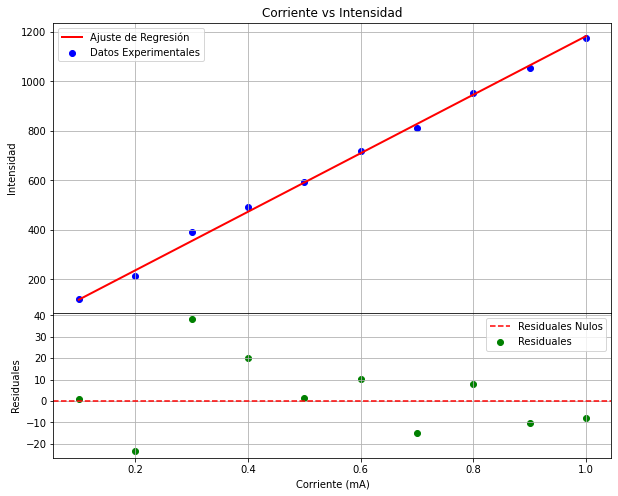

In [204]:
import matplotlib.gridspec as gridspec
# Extrae las columnas de Corriente y Intensidad
corriente = df_seleccionados['Corriente (mA)']
intensidad = df_seleccionados['Tasa con 35kV']

# Calcular los residuales
residuales = intensidad - fit_func(corriente, b)

# Crear una figura con GridSpec
fig = plt.figure(figsize=(10, 8), constrained_layout=True)
spec = gridspec.GridSpec(2, 1, figure=fig, height_ratios=[2, 1])

# Gráfica de corriente vs intensidad
ax1 = fig.add_subplot(spec[0])
ax1.scatter(corriente, intensidad, label='Datos Experimentales', color='blue', marker='o')
ax1.plot(corriente_fit, intensidad_fit, 'r-', label='Ajuste de Regresión', linewidth=2)
ax1.set_xlabel('Corriente (mA)')
ax1.set_ylabel('Intensidad')
ax1.set_title('Corriente vs Intensidad')
ax1.grid(True)
ax1.legend()

# Gráfica de residuales
ax2 = fig.add_subplot(spec[1])
ax2.scatter(corriente, residuales, label='Residuales', color='green', marker='o')
ax2.axhline(y=0, color='red', linestyle='--', label='Residuales Nulos')
ax2.set_xlabel('Corriente (mA)')
ax2.set_ylabel('Residuales')
ax2.grid(True)
ax2.legend()

# Ajustar espacio vertical
fig.subplots_adjust(hspace=0.4)

# Mostrar la gráfica
plt.subplots_adjust(hspace=0)
# Muestra la gráfica completa
plt.savefig('fit_corriente_variable.png')
plt.show()

In [205]:
# Nombre del archivo .txt
nombre_archivo = 'Actividad_4_Duane-Hunt/Actividad_4.txt'

# Leer el archivo y especificar el separador '\t' (tabulación)
# Definir los nombres de las columnas
nombres_columnas = [
    'Ángulo del crista',
    'Tasa con 13kV',
    'Tasa con 15kV',
    'Tasa con 17kV',
    'Tasa con 19kV',
    'Tasa con 21kV',
    'Tasa con 23kV',
    'Tasa con 25kV',
    'Tasa con 27kV',
    'Tasa con 29kV',
    'Tasa con 31kV',
    'Tasa con 33kV',
    'Tasa con 35kV'
]

data = pd.read_csv(nombre_archivo, sep='\t', decimal=',', names = nombres_columnas, header = 1)
data

,Ángulo del crista,Tasa con 13kV,Tasa con 15kV,Tasa con 17kV,Tasa con 19kV,Tasa con 21kV,Tasa con 23kV,Tasa con 25kV,Tasa con 27kV,Tasa con 29kV,Tasa con 31kV,Tasa con 33kV,Tasa con 35kV
0,8.0,4.0,3.0,7.0,9.0,28.0,26.0,48.0,65.0,77.0,85.0,97.0,138.0
1,8.1,5.0,5.0,5.0,9.0,22.0,32.0,47.0,54.0,77.0,83.0,101.0,124.0
2,8.2,2.0,3.0,5.0,9.0,24.0,34.0,50.0,49.0,81.0,87.0,108.0,116.0
3,8.3,2.0,5.0,8.0,9.0,22.0,38.0,52.0,54.0,78.0,91.0,96.0,121.0
4,8.4,2.0,5.0,4.0,7.0,18.0,33.0,46.0,61.0,70.0,87.0,99.0,126.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,18.6,5.0,14.0,24.0,35.0,37.0,49.0,56.0,71.0,90.0,110.0,119.0,144.0
107,18.7,10.0,20.0,25.0,39.0,50.0,70.0,61.0,89.0,98.0,106.0,139.0,161.0
108,18.8,14.0,31.0,44.0,64.0,81.0,107.0,131.0,141.0,183.0,205.0,220.0,261.0
109,18.9,34.0,61.0,98.0,149.0,181.0,245.0,274.0,353.0,389.0,496.0,527.0,632.0


In [206]:
# Constante d en metros
d = 2.014e-10
data['Ángulo del crista'] = data['Ángulo del crista'] + 1.5
# Calcular la longitud de onda en Armstrong y almacenarla en una nueva columna llamada 'Longitud de Onda (Å)'
data['Longitud de Onda (Å)'] = calcular_longitud_de_onda(data['Ángulo del crista'])[0:100]

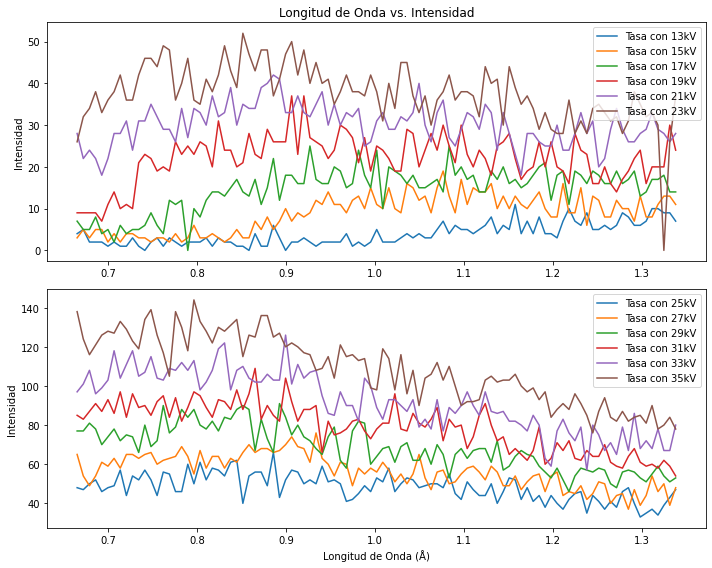

In [208]:
# Extraer los datos de longitud de onda y las tasas para cada voltaje
voltajes = [13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35]
voltajes_labels = [f"Tasa con {kv}kV" for kv in voltajes]
longitudes_de_onda = data['Longitud de Onda (Å)']

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Configurar el título y etiquetas de los ejes para el primer subplot
ax1.set_title('Longitud de Onda vs. Intensidad')
ax1.set_ylabel('Intensidad')
for voltaje in voltajes_labels[:6]:
    ax1.plot(longitudes_de_onda, data[voltaje], label=voltaje)
ax1.legend()

# Configurar el título y etiquetas de los ejes para el segundo subplot
ax2.set_xlabel('Longitud de Onda (Å)')
ax2.set_ylabel('Intensidad')
for voltaje in voltajes_labels[6:]:
    ax2.plot(longitudes_de_onda, data[voltaje], label=voltaje)
ax2.legend()

# Ajustar la disposición de los subplots
plt.tight_layout()

# Mostrar las gráficas
plt.savefig('punto4.png')
plt.show()